#### March 7, 2024 --> New GALFIT output parameters! 

Both masking and the treatment of group galaxies differ from the previous routine. This notebook will evaluate to what degree the model parameters differ as well.

In [153]:
#the usual incantation to ignore deprecation warning text
import warnings
warnings.filterwarnings('ignore')

In [208]:
%run newgalfitparams.py
cat = catalogs(fixedbapa=False)

USAGE: 
                --- cat=catalogs(fixedbapa=False)  --> fixedbapa dictates whether the catalogs
                          entered are with BA, PA that were held fixed or freely iterated over
                --- cat.fixedfree_comp() --> comparison of W3 CRE vs CN and W1 CRE vs. CN for 
                    both the fixed and free cases; assumes user has both sets of catalogs!
                --- cat.rbandcomp() --> compares W1, W3 CRE, CN, CPA, and CAR with r-band 
                    counterparts; also calculates fraction of r-band errors relative to subsample.
                --- cat.comp_oldnew(zoom=False) --> 2x2 panel figure comparing old/new CRE and CN
                    for W3 and W1. zoom=True recreates these panels, but with a magnification
                    on the locus about the 1-to-1 line.
    
Final subsample size (inc. SNR, t-type, magphys, and W1+W3 galfit flags): 518
magflag+SNR+t-type only: 701

for full catalog (galfit errors only) -- Free BA, PA:
fraction ga

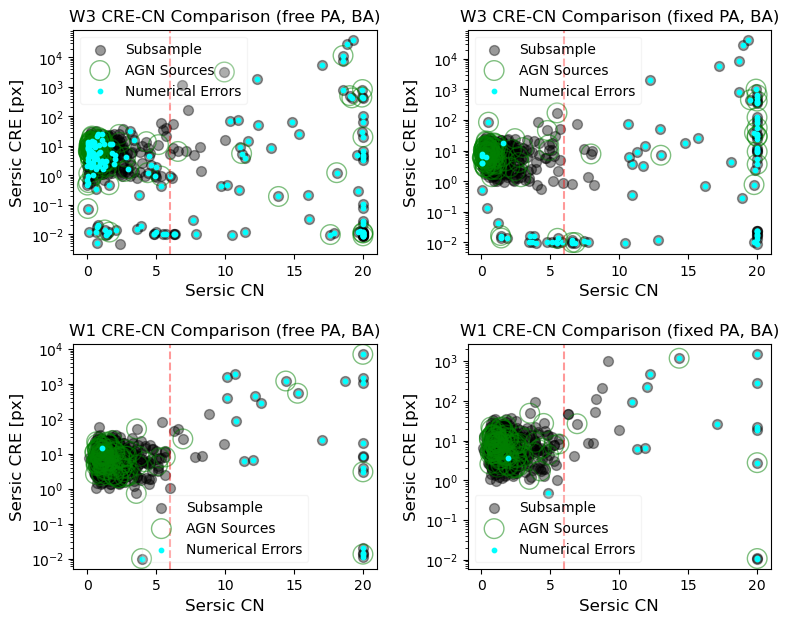

galaxies in W3 (free) plot with <0.1 CRE and <6 CN:
['VFID0098', 'VFID0102', 'VFID0168', 'VFID0172', 'VFID0382', 'VFID1399', 'VFID1628', 'VFID2295', 'VFID2591', 'VFID2620', 'VFID2942', 'VFID3861', 'VFID3884', 'VFID5183', 'VFID5367', 'VFID5930', 'VFID6182', 'VFID6742']

galaxies in W3 (free) plot with >6 CN:
['VFID0001', 'VFID0013', 'VFID0019', 'VFID0026', 'VFID0029', 'VFID0088', 'VFID0170', 'VFID0281', 'VFID0349', 'VFID0413', 'VFID0432', 'VFID0611', 'VFID0619', 'VFID0785', 'VFID0851', 'VFID0893', 'VFID0960', 'VFID0993', 'VFID1015', 'VFID1085', 'VFID1173', 'VFID1175', 'VFID1182', 'VFID1217', 'VFID1279', 'VFID1307', 'VFID1317', 'VFID1374', 'VFID1402', 'VFID1405', 'VFID1518', 'VFID1548', 'VFID1601', 'VFID1635', 'VFID1652', 'VFID1678', 'VFID1683', 'VFID1700', 'VFID1754', 'VFID1933', 'VFID1942', 'VFID1984', 'VFID2027', 'VFID2083', 'VFID2160', 'VFID2269', 'VFID2401', 'VFID2405', 'VFID2513', 'VFID2617', 'VFID2677', 'VFID2764', 'VFID2772', 'VFID2856', 'VFID2975', 'VFID3269', 'VFID3561', 'VFID3

In [209]:
cat.fixedfree_comp()

frac points without r-band errors (/518): 0.971


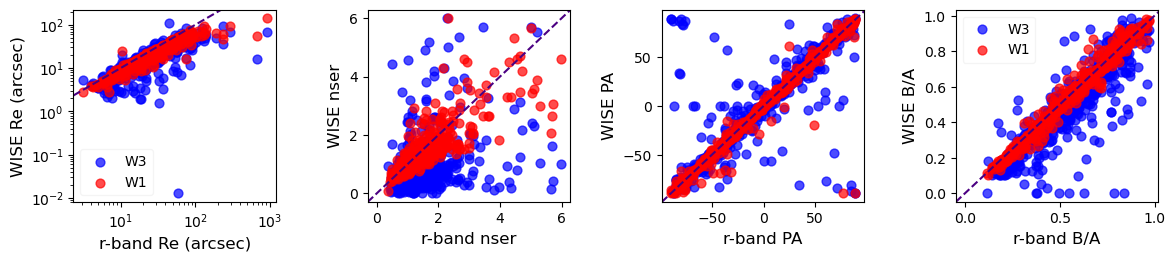

In [138]:
cat.rbandcomp()

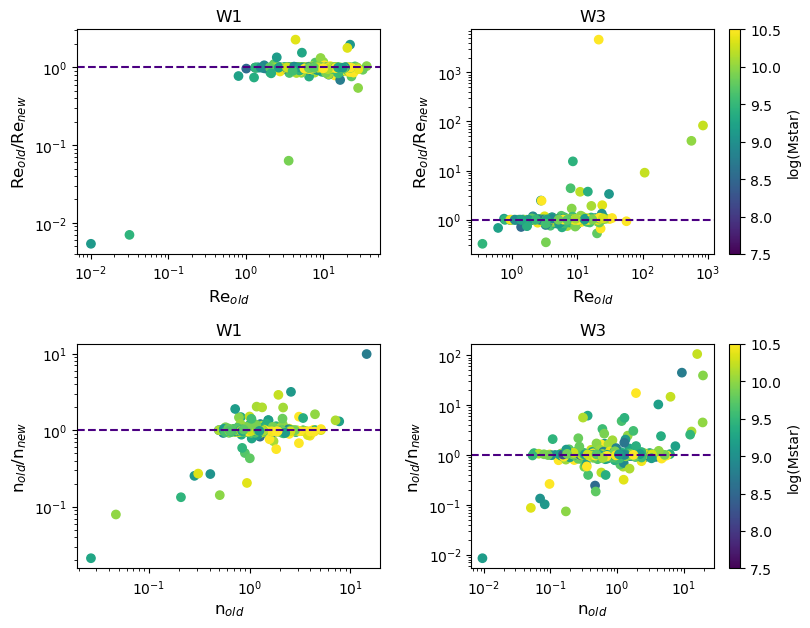

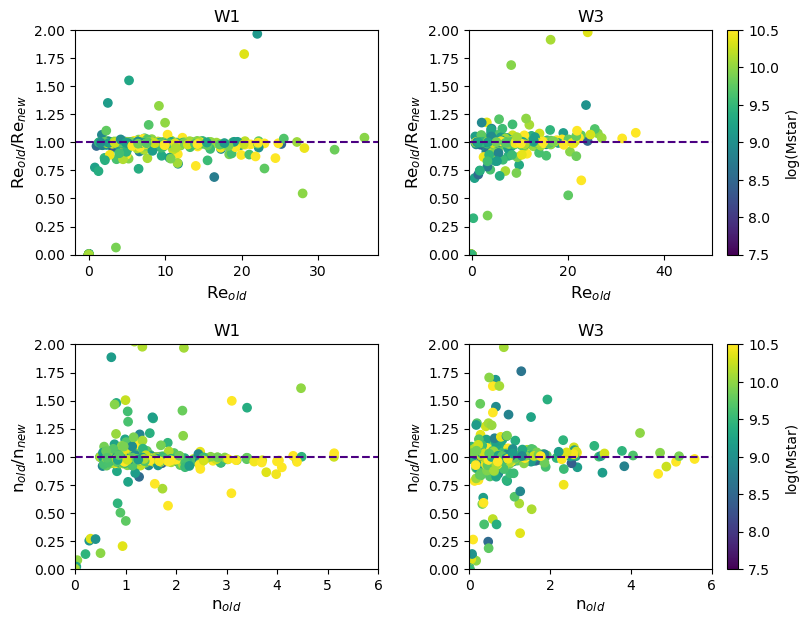

In [139]:
cat.comp_oldnew(zoom=True)

-----
The `type' column is used to distinguish central and satellite galaxies. Type 0 is central galaxy. Type 1 and 2 are satellite galaxies with and without subhalos. The latter is often referred as orphan galaxy.

In [93]:
from astropy.io import ascii
import scipy
from scipy.stats import median_abs_deviation as MAD
gradhot = ascii.read(homedir+'/Desktop/Sim_pred_size/GAEA_GRADHOT_z=0.csv',delimiter=',')
rpscold = ascii.read(homedir+'/Desktop/Sim_pred_size/GAEA_RPS_z=0.csv',delimiter=',')

gradhot_mhalo_flag = (gradhot['Mhalo']>12.5) & (gradhot['Mhalo']<13) & (gradhot['Type']!=0)
grad_virgo_cuts = (gradhot['Re_star'] > -3.) & (gradhot['Mstar']<11) & (gradhot['B/T']<0.5) & ((gradhot['SFR'] - gradhot['Mstar'])>-11)

rps_mhalo_flag = (rpscold['Mhalo']>12.5) & (rpscold['Mhalo']<13) & (rpscold['Type']!=0)
rps_virgo_cuts = (rpscold['Re_star'] > -3.) & (rpscold['Mstar']<11) & (rpscold['B/T']<0.5) & ((rpscold['SFR'] - rpscold['Mstar'])>-11)

gradhot_mhalo_flag_field = (gradhot['Mhalo']<12.5) & (gradhot['Type']==0)
rps_mhalo_flag_field = (rpscold['Mhalo']<12.5) & (rpscold['Type']==0)


gradhot_cut = gradhot[gradhot_mhalo_flag & grad_virgo_cuts]
rpscold_cut = rpscold[rps_mhalo_flag & rps_virgo_cuts]

gradhot_cut_field = gradhot[gradhot_mhalo_flag_field & grad_virgo_cuts]
rpscold_cut_field = rpscold[rps_mhalo_flag_field & rps_virgo_cuts]

In [133]:
gradhot_re_sfr = gradhot_cut['Re_HI [kpc]']
#gradhot_re_sfr = gradhot_cut['Re_SFR']
gradhot_re_star = gradhot_cut['Re_star']
gradhot_mstar = gradhot_cut['Mstar']
gradhot_ratio = gradhot_re_sfr/gradhot_re_star

rpscold_re_sfr = rpscold_cut['Re_HI [kpc]']
#rpscold_re_sfr = rpscold_cut['Re_SFR']
rpscold_re_star = rpscold_cut['Re_star']
rpscold_mstar = rpscold_cut['Mstar']
rpscold_ratio = rpscold_re_sfr/rpscold_re_star

##########

gradhot_re_sfr_field = gradhot_cut_field['Re_HI [kpc]']
#gradhot_re_sfr_field = gradhot_cut_field['Re_SFR']
gradhot_re_star_field = gradhot_cut_field['Re_star']
gradhot_mstar_field = gradhot_cut_field['Mstar']
gradhot_ratio_field = gradhot_re_sfr_field/gradhot_re_star_field

rpscold_re_sfr_field = rpscold_cut_field['Re_HI [kpc]']
#rpscold_re_sfr_field = rpscold_cut_field['Re_SFR']
rpscold_re_star_field = rpscold_cut_field['Re_star']
rpscold_mstar_field = rpscold_cut_field['Mstar']
rpscold_ratio_field = rpscold_re_sfr_field/rpscold_re_star_field

In [134]:
mybins_all=30

bin_means_grad, bin_edges_grad, binnumber_grad = scipy.stats.binned_statistic(gradhot_mstar, gradhot_ratio, statistic='median', bins=mybins_all)
err_grad, bin_edges_grad, binnumber_grad = scipy.stats.binned_statistic(gradhot_mstar, gradhot_ratio, statistic=MAD, bins=mybins_all)
bin_centers_grad = .5*(bin_edges_grad[:-1]+bin_edges_grad[1:])   

bin_means_rps, bin_edges_rps, binnumber_rps = scipy.stats.binned_statistic(rpscold_mstar, rpscold_ratio, statistic='median', bins=mybins_all)
err_rps, bin_edges_rps, binnumber_rps = scipy.stats.binned_statistic(rpscold_mstar, rpscold_ratio, statistic=MAD, bins=mybins_all)
bin_centers_rps = .5*(bin_edges_rps[:-1]+bin_edges_rps[1:])   

gradhot_lower = bin_means_grad - err_grad
gradhot_upper = bin_means_grad + err_grad
rpscold_lower = bin_means_rps - err_rps
rpscold_upper = bin_means_rps + err_rps

bin_means_grad_field, bin_edges_grad_field, binnumber_grad_field = scipy.stats.binned_statistic(gradhot_mstar_field, gradhot_ratio_field, statistic='median', bins=mybins_all)
err_grad_field, bin_edges_grad_field, binnumber_grad_field = scipy.stats.binned_statistic(gradhot_mstar_field, gradhot_ratio_field, statistic=MAD, bins=mybins_all)
bin_centers_grad_field = .5*(bin_edges_grad_field[:-1]+bin_edges_grad_field[1:])   

bin_means_rps_field, bin_edges_rps_field, binnumber_rps_field = scipy.stats.binned_statistic(rpscold_mstar_field, rpscold_ratio_field, statistic='median', bins=mybins_all)
err_rps_field, bin_edges_rps_field, binnumber_rps_field = scipy.stats.binned_statistic(rpscold_mstar_field, rpscold_ratio_field, statistic=MAD, bins=mybins_all)
bin_centers_rps_field = .5*(bin_edges_rps_field[:-1]+bin_edges_rps_field[1:])  

gradhot_lower_field = bin_means_grad_field - err_grad_field
gradhot_upper_field = bin_means_grad_field + err_grad_field
rpscold_lower_field = bin_means_rps_field - err_rps_field
rpscold_upper_field = bin_means_rps_field + err_rps_field

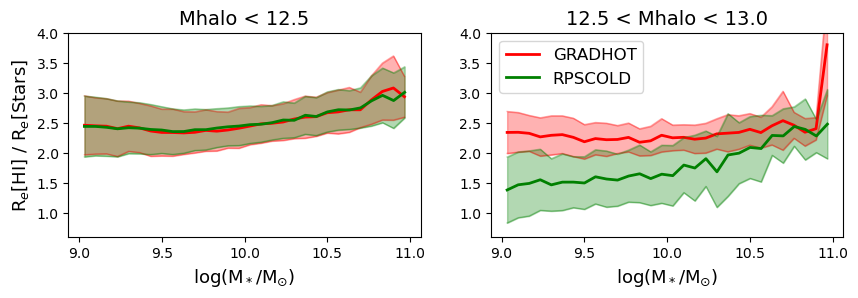

In [135]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
grad_line_field = plt.plot(bin_centers_grad_field, bin_means_grad_field, linestyle='-', lw=2, color='r',label='GRADHOT')
plt.plot(bin_centers_grad_field, gradhot_lower_field, linestyle='-',lw=1,  color='r',alpha=0.3)
plt.plot(bin_centers_grad_field, gradhot_upper_field, linestyle='-',lw=1,  color='r',alpha=0.3)
plt.fill_between(bin_centers_grad_field, gradhot_lower_field,y2=gradhot_upper_field,color='r',alpha=0.3)

rps_line_field = plt.plot(bin_centers_rps_field, bin_means_rps_field, linestyle='-', lw=2, color='g',label='RPSCOLD')
plt.plot(bin_centers_rps_field, rpscold_lower_field, linestyle='-',lw=1,  color='g',alpha=0.3)
plt.plot(bin_centers_rps_field, rpscold_upper_field, linestyle='-',lw=1,  color='g',alpha=0.3)
plt.fill_between(bin_centers_rps_field, rpscold_lower_field,y2=rpscold_upper_field,color='g',alpha=0.3)

plt.xlabel(r'log(M$_*$/M$_{\odot}$)',fontsize=13)
#plt.ylabel(r'R$_e$[SFR] / R$_e$[Stars]',fontsize=13)
plt.ylabel(r'R$_e$[HI] / R$_e$[Stars]',fontsize=13)
plt.title(r'Mhalo < 12.5',fontsize=14)
plt.ylim(0.6,4)
#plt.ylim(0.3,1.2)

plt.subplot(1,2,2)
grad_line = plt.plot(bin_centers_grad, bin_means_grad, linestyle='-', lw=2, color='r',label='GRADHOT')
plt.plot(bin_centers_grad, gradhot_lower, linestyle='-',lw=1,  color='r',alpha=0.3)
plt.plot(bin_centers_grad, gradhot_upper, linestyle='-',lw=1,  color='r',alpha=0.3)
plt.fill_between(bin_centers_grad, gradhot_lower,y2=gradhot_upper,color='r',alpha=0.3)

rps_line = plt.plot(bin_centers_rps, bin_means_rps, linestyle='-', lw=2, color='g',label='RPSCOLD')
plt.plot(bin_centers_rps, rpscold_lower, linestyle='-',lw=1,  color='g',alpha=0.3)
plt.plot(bin_centers_rps, rpscold_upper, linestyle='-',lw=1,  color='g',alpha=0.3)
plt.fill_between(bin_centers_rps, rpscold_lower,y2=rpscold_upper,color='g',alpha=0.3)
plt.title(r'12.5 < Mhalo < 13.0',fontsize=14)
plt.xlabel(r'log(M$_*$/M$_{\odot}$)',fontsize=13)
plt.ylim(0.6,4)
#plt.ylim(0.3,1.2)

plt.legend(fontsize=12)

plt.subplots_adjust(bottom=.2)

plt.savefig(homedir+'/Desktop/ngcgroup_fig',dpi=150)

plt.show()